<a href="https://colab.research.google.com/github/ved619/test/blob/main/Mnist_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
data_set=pd.read_csv("/content/sample_data/mnist_train_small.csv")

In [ ]:
data_set.shape

(19999, 785)

In [ ]:
train,test=train_test_split(data_set,test_size=0.2)


In [ ]:
print(train)
print(test)

       6  0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
18897  0  0    0    0    0    0  ...      0      0      0      0      0      0
8047   4  0    0    0    0    0  ...      0      0      0      0      0      0
14791  0  0    0    0    0    0  ...      0      0      0      0      0      0
3943   9  0    0    0    0    0  ...      0      0      0      0      0      0
2135   7  0    0    0    0    0  ...      0      0      0      0      0      0
...   .. ..  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
15190  9  0    0    0    0    0  ...      0      0      0      0      0      0
15667  1  0    0    0    0    0  ...      0      0      0      0      0      0
12197  8  0    0    0    0    0  ...      0      0      0      0      0      0
7086   0  0    0    0    0    0  ...      0      0      0      0      0      0
11020  3  0    0    0    0    0  ...      0      0      0      0      0      0

[15999 rows x 785 columns]
       6  0  0.1  0.2  0

In [ ]:
print(data_set.head())

   6  0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
0  5  0    0    0    0    0  ...      0      0      0      0      0      0
1  7  0    0    0    0    0  ...      0      0      0      0      0      0
2  9  0    0    0    0    0  ...      0      0      0      0      0      0
3  5  0    0    0    0    0  ...      0      0      0      0      0      0
4  2  0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]


In [ ]:
xtrain=train.iloc[:,1:]
xtest=test.iloc[:,1:]

In [ ]:
ytrain=train.iloc[:,0]
ytest=test.iloc[:,0]

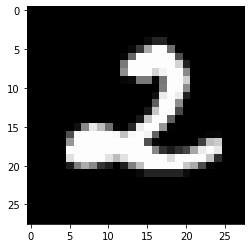

In [ ]:
r=random.randint(0,4000)
random_dig=xtest.iloc[r]
random_dig_image=random_dig.values.reshape(28,28) #reshaping to plot
plt.imshow(random_dig_image,cmap="gray")

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn.score(xtest,ytest)

0.964

In [ ]:
predict=knn.predict([random_dig])
print(predict)

[2]


In [ ]:
distortions = []
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(xtrain)
    distortions.append(kmeanModel.inertia_)

**Elbow Curve**

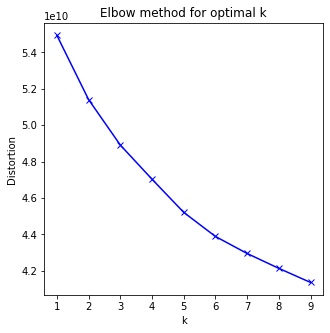

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method for optimal k')
plt.show()

In [ ]:
acc=[]
for x in range(1,5):
  m=KNeighborsClassifier(n_neighbors=x)
  m.fit(xtrain,ytrain)
  acc.append(knn.score(xtest,ytest))